# **Dataset Information**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/hate_speech_hindi.csv")

In [ ]:
contains_fake = df['label'].str.contains('fake', case=False, na=False)
df = df[contains_fake == False]

In [ ]:
# Shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)


Shape of dataset: (18763, 7)




The dataset has *18,763* rows and *7* columns




<br>

In [ ]:
# Column names
print("Columns:", df.columns.tolist())


Columns: ['text', 'label', 'defamation', 'hate', 'non-hate', 'violence', 'vulgar']




*  'Text' is the actual content
*   label' indicates what type of speech is present
*   others are binary indicators for specific hate speech categories.




<br>

In [ ]:
# Data types of each column
print("Data types:\n", df.dtypes)


Data types:
 text          object
label         object
defamation     int64
hate           int64
non-hate       int64
violence       int64
vulgar         int64
dtype: object


In [ ]:
# Check missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 text          0
label         0
defamation    0
hate          0
non-hate      0
violence      0
vulgar        0
dtype: int64


In [ ]:
# Summary statistics for numeric columns
print("Summary stats:\n", df.describe())

Summary stats:
          defamation          hate      non-hate      violence        vulgar
count  18763.000000  18763.000000  18763.000000  18763.000000  18763.000000
mean       0.279166      0.349944      0.473165      0.242392      0.221660
std        0.448601      0.476965      0.499293      0.428542      0.415374
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%        1.000000      1.000000      1.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000      1.000000      1.000000


Summary statistics show how common each type of hate speech is.

 For example, the 'hate' column has an average of 0.35, meaning about 35% of samples are marked as hate speech.


<br>

In [ ]:
# First 5 rows
print("Sample rows:\n", df.head())

Sample rows:
                                                 text              label  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,vulgar   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hate   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hate   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,vulgar   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hate   

   defamation  hate  non-hate  violence  vulgar  
0           0     1         0         0       1  
1           0     0         1         0       0  
2           0     0         1         0       0  
3           1     0         0         0       1  
4           0     0         1         0       0  


<br>

<br>

# **EDA**

### **Label Distribution**

In [ ]:
import matplotlib.pyplot as plt

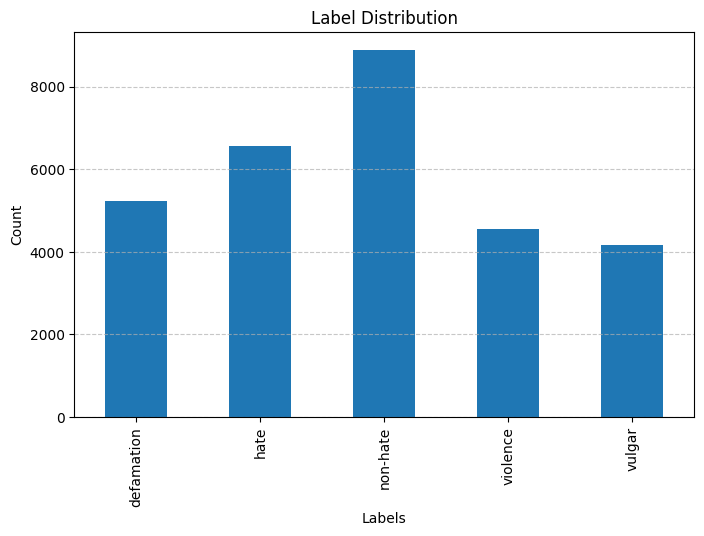

In [ ]:
label_cols = ['defamation', 'hate', 'non-hate', 'violence', 'vulgar']
label_counts = df[label_cols].sum()

plt.figure(figsize=(8,5))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Each label column is a 0 or 1, so summing the column counts all samples with that label.

<br>

In [ ]:
print("\nUnique label combinations:", df['label'].nunique())
print("\nTop 10 label combinations:\n", df['label'].value_counts())


Unique label combinations: 22

Top 10 label combinations:
 label
non-hate                                    8878
hate,vulgar,violence                        1403
defamation,hate                             1373
hate                                        1180
defamation                                   887
defamation,vulgar                            857
hate,violence                                831
hate,violence,defamation                     637
hate,violence,vulgar,defamation              600
vulgar                                       579
defamation,vulgar,violence                   446
violence                                     421
hate,vulgar                                  233
defamation,violence                          129
hate,defamation                              106
defamation,hate,violence                      65
hate,defamation,vulgar                        41
defamation,defamation,hate                    40
defamation,hate,hate                          32
def

### **Text Length Analysis**


Text length stats:
 count    18763.000000
mean        23.148324
std         15.161864
min          2.000000
25%         12.000000
50%         19.000000
75%         31.000000
max        138.000000
Name: text_length, dtype: float64


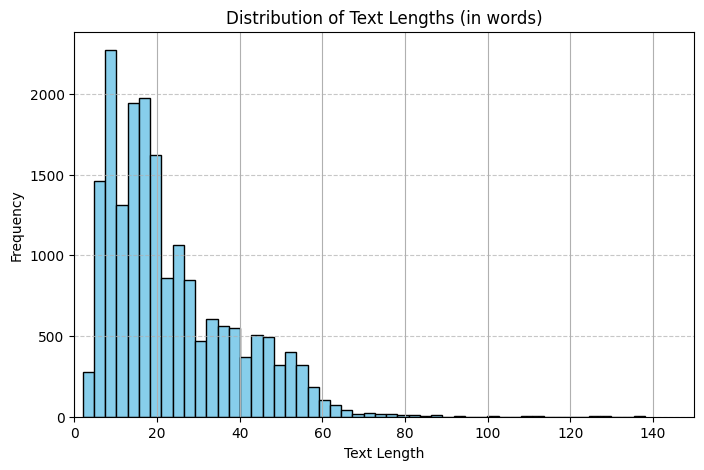

In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print("\nText length stats:\n", df['text_length'].describe())

plt.figure(figsize=(8,5))
df['text_length'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Lengths (in words)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xlim(0, 150)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram shows the length of all messages in the data. Most are clustered under 40 words, with a long right tail of longer texts

<br>

### **Class Imbalance Check**


Number of labels per sample:
 num_labels
1    11945
2     3610
3     2608
4      600
Name: count, dtype: int64


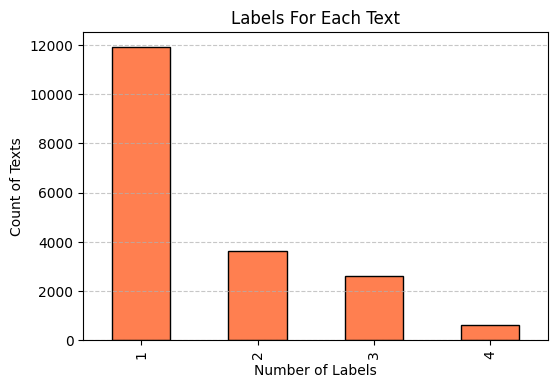

In [ ]:
df['num_labels'] = df[label_cols].sum(axis=1)
print("\nNumber of labels per sample:\n", df['num_labels'].value_counts())

plt.figure(figsize=(6,4))
df['num_labels'].value_counts().sort_index().plot(kind='bar', color='coral', edgecolor='black')
plt.title("Labels For Each Text")
plt.xlabel("Number of Labels")
plt.ylabel("Count of Texts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Correlation Between Labels**

In [ ]:
import seaborn as sns

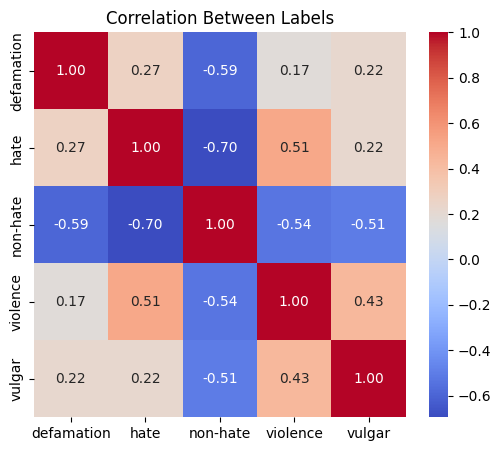

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[label_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Labels")
plt.show()

### **Average Text Length per Label**


Average text length per label:
 {'defamation': np.float64(23.98720885834288), 'hate': np.float64(20.811452939384708), 'non-hate': np.float64(23.41473304798378), 'violence': np.float64(17.863236587510993), 'vulgar': np.float64(22.44121182976677)}


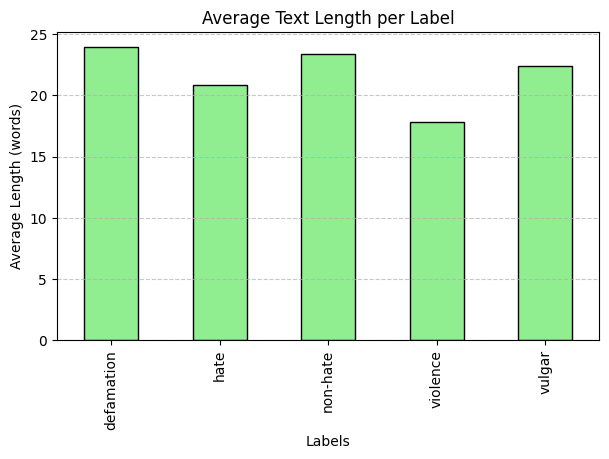

In [ ]:
avg_len_per_label = {col: df[df[col] == 1]['text_length'].mean() for col in label_cols}
print("\nAverage text length per label:\n", avg_len_per_label)

plt.figure(figsize=(7,4))
pd.Series(avg_len_per_label).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average Text Length per Label")
plt.xlabel("Labels")
plt.ylabel("Average Length (words)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Some labels, like 'violence', tend to appear in shorter messages, while others, like 'defamation', appear in longer messages. This analysis informs which text types are verbose or short.

<br>

### **Most common words per label**

In [ ]:
from collections import Counter

In [ ]:
def top_words_for_label(label, n=15):
    texts = df[df[label] == 1]['text']
    all_words = " ".join(str(t) for t in texts).split()
    return Counter(all_words).most_common(n)

print("\nTop words in 'hate':\n", top_words_for_label('hate'))
print("\nTop words in 'non-hate':\n", top_words_for_label('non-hate'))


Top words in 'hate':
 [('के', 4618), ('की', 3401), ('में', 3072), ('को', 2782), ('है', 2563), ('से', 2222), ('का', 1956), ('नहीं', 1577), ('और', 1502), ('पर', 1175), ('ने', 1143), ('भी', 1126), ('हैं.', 955), ('तो', 895), ('एक', 880)]

Top words in 'non-hate':
 [('के', 7736), ('में', 5508), ('की', 5382), ('को', 3832), ('से', 3601), ('का', 3203), ('ने', 2646), ('है', 2423), ('पर', 2309), ('और', 2066), ('नहीं', 1356), ('लिए', 1207), ('भी', 1131), ('एक', 1084), ('है।', 1024)]


### **Check for Special Tokens**

In [ ]:
import re

In [ ]:
df['has_hashtag'] = df['text'].apply(lambda x: 1 if re.search(r"#\w+", str(x)) else 0)
df['has_mention'] = df['text'].apply(lambda x: 1 if re.search(r"@\w+", str(x)) else 0)
df['has_url'] = df['text'].apply(lambda x: 1 if re.search(r"http\S+|www\S+", str(x)) else 0)

print("\nPercentage of texts with hashtags: {:.2f}%".format(df['has_hashtag'].mean()*100))
print("Percentage of texts with mentions: {:.2f}%".format(df['has_mention'].mean()*100))
print("Percentage of texts with URLs: {:.2f}%".format(df['has_url'].mean()*100))


Percentage of texts with hashtags: 14.98%
Percentage of texts with mentions: 14.06%
Percentage of texts with URLs: 20.31%


### **Duplicate text check**


In [ ]:
duplicate_count = df['text'].duplicated().sum()
print("\nNumber of duplicate texts:", duplicate_count)

if duplicate_count > 0:
    print("\nSample duplicates:\n", df[df['text'].duplicated()]['text'].head())


Number of duplicate texts: 940

Sample duplicates:
 3128    @RaviGup53080986 @narendramodi मोदी जी के पागल...
3217    #रोज़गार_नहीं_तो_सरकार_नहीं जितना तारीफ की जाए...
3409    @anuragkashyap72 फिलहाल क्या किसी का  एक झांठ ...
4523    हिन्दू का खून लाल मुसलमान का खून लाल, बताऔ कौन...
4655    @pankajs89796129 साला  चरस फूकने वाला  है। साल...
Name: text, dtype: object


<br>

<br>

# **Preprocessing**

### **Basic Cleaning**

In [ ]:
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates(subset="text", keep="first").reset_index(drop=True)
print("After removing duplicates:", df.shape)

Before removing duplicates: (18763, 12)
After removing duplicates: (17823, 12)


In [ ]:
import unicodedata

In [ ]:
def simplified_text_cleaning(text):
    text = str(text)

    # Normalize unicode characters to their standard representations
    text = unicodedata.normalize("NFKC", text)

    # Convert text to lower case
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # Remove user mentions (@username)
    text = re.sub(r"@\w+", "", text)

    # Remove just the hashtag symbol, keeping the text
    text = re.sub(r"#", "", text)

    # Replace Hindi punctuation with a space for word tokenization
    text = text.replace("।", " ").replace("|", " ")

    # Keep only Hindi, English characters, and spaces
    text = re.sub(r"[^a-zA-Z\u0900-\u097F\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
df["clean_text"] = df["text"].apply(simplified_text_cleaning)

This function cleans up our text by removing web links, social handles, hashtags, special characters, and non-letter symbols. It makes messages easier for both humans and computers to analyze.

<br>

In [ ]:
print("\n--- Cleaning Example ---")
print("Original Text:\n", df["text"].iloc[0])
print("\nCleaned Text:\n", df["clean_text"].iloc[0])


--- Cleaning Example ---
Original Text:
 मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है 

🙏 जय श्री राम 🙏

Cleaned Text:
 मेरे देश के हिन्दु बहुत निराले है कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है जय श्री राम


### **Stopword Removal**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NLTK provides lists of common words called 'stopwords' (like 'the', 'is', 'to', etc.), which are often removed before analysis since they add little information.

<br>

In [ ]:
hindi_stopwords = set([
    "अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप",
    "इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों",
    "इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें",
    "उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस",
    "उसके","уси","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई",
    "कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी","कि",
    "किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी",
    "किसे","की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा",
    "गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन",
    "जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक",
    "तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों","तिस","तिसे","तो","था",
    "थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा",
    "न","नहिं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा",
    "पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर",
    "भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या",
    "यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह",
    "वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग",
    "सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि",
    "ही","हुअ","हुआ","हुइ","हुई","हुए","हे","हें","है","हैं","हो","होता","होति",
    "होती","होते","होना","होने"
])

In [ ]:
english_stopwords = set(stopwords.words("english"))

In [ ]:
stop_words = hindi_stopwords | english_stopwords

In [ ]:
important_words = {"नहीं", "ना", "है", "हैं", "हो", "था", "थी", "थे"}
filtered_stopwords = stop_words - important_words

In [ ]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in filtered_stopwords])

df["text_no_stopwords"] = df["clean_text"].apply(remove_stopwords)

We remove frequent but unimportant words from both Hindi and English text, but keep certain key words that carry strong meaning

<br>

In [ ]:
print("\n--- Final Text Example ---")
print("Original:\n", df["text"].iloc[0])
print("\nCleaned:\n", df["clean_text"].iloc[0])
print("\nWithout stopwords:\n", df["text_no_stopwords"].iloc[0])


--- Final Text Example ---
Original:
 मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है 

🙏 जय श्री राम 🙏

Cleaned:
 मेरे देश के हिन्दु बहुत निराले है कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है जय श्री राम

Without stopwords:
 मेरे देश हिन्दु निराले है पक्के राम भक्त है बाबर साले है जय श्री राम


<br>

<br>

# **EDA on Preprocessed Dataset**

In [ ]:
# Calculate length of the final processed text
df['final_text_length'] = df['text_no_stopwords'].apply(lambda x: len(x.split()))

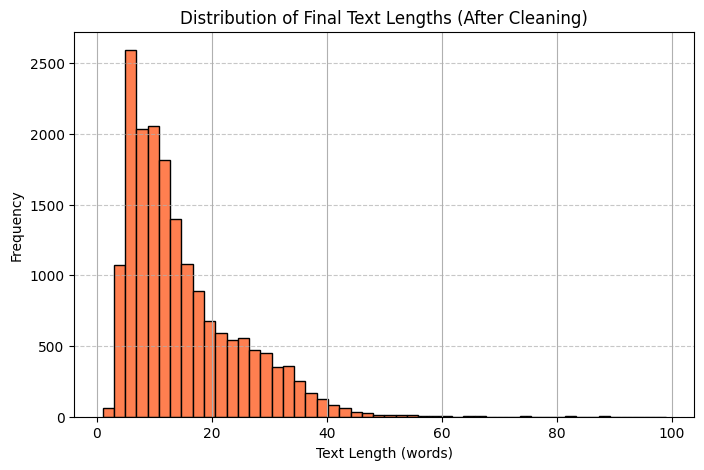

In [ ]:
plt.figure(figsize=(8,5))
df['final_text_length'].hist(bins=50, color='coral', edgecolor='black')
plt.title("Distribution of Final Text Lengths (After Cleaning)")
plt.xlabel("Text Length (words)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
def top_words_cleaned(label, n=15):
    texts = df[df[label] == 1]['text_no_stopwords']
    all_words = " ".join(texts).split()
    return Counter(all_words).most_common(n)

print("\nTop words in 'hate' (after cleaning):\n", top_words_cleaned('hate'))
print("\nTop words in 'non-hate' (after cleaning):\n", top_words_cleaned('non-hate'))


Top words in 'hate' (after cleaning):
 [('है', 4021), ('हैं', 1920), ('नहीं', 1525), ('हो', 913), ('देश', 548), ('तुम', 535), ('चाहिए', 445), ('मुझे', 431), ('क्या', 418), ('मैं', 380), ('भारत', 349), ('लोगों', 337), ('था', 324), ('सरकार', 322), ('रही', 300)]

Top words in 'non-hate' (after cleaning):
 [('है', 4315), ('हैं', 1788), ('नहीं', 1315), ('हो', 763), ('भारत', 711), ('जी', 617), ('कोरोना', 593), ('देश', 500), ('क्या', 492), ('लोगों', 478), ('आज', 461), ('पुलिस', 440), ('सरकार', 438), ('था', 438), ('श्री', 414)]


In [ ]:
# Save the Final Cleaned Dataset
final_df = df[['text', 'clean_text', 'text_no_stopwords'] + label_cols]
final_df.to_csv("hate_speech_hindi_preprocessed.csv", index=False)